## 1. Import libraries

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import eda_helper_functions
import missingno as msno
from sklearn.ensemble import IsolationForest
pd.set_option('display.max_columns', None)
import os

## 2. Read the Training Data

In [8]:
def get_data(name):
    # Check if the dataset directory exists
    current_dir = os.getcwd()
    print("Current directory:", current_dir)

    if current_dir == "/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp":
        print("Dataset directory is correct.")
    else:
        # change directory
        current_dir = os.chdir('/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp')
        print("Current directory updated")

    # Check if the file exists
    data_path = "Midterm Project/German Real State Project/Data"
    file_name = f"{name}.csv"
    file_path = os.path.join(current_dir, data_path,file_name)
    return pd.read_csv(file_path)

In [9]:
train = get_data('cleaned_data')
train.shape

Current directory: /Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp
Dataset directory is correct.


(200141, 30)

In [10]:
train.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,livingSpaceRange,stateName,heatingType,telekomTvOffer,newlyConst,balcony,firingTypes,hasKitchen,cellar,condition,interiorQual,petsAllowed,lift,typeOfFlat,garden,cityName,cityDistrict,yearConstructed_category,floor_category
0,245.00,6,4.62,10.0,840.0,2.0,595.0,86.00,4,44269,4,4,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,False,oil,False,True,well_kept,normal,unknown,False,ground_floor,True,Dortmund,Schüren,1952-1973,floor_0_3
1,255.00,8,2.72,2.4,1300.0,9.0,965.0,83.80,6,1097,3,4,Sachsen,floor_heating,ONE_YEAR_FREE,True,True,district_heating,False,True,first_time_use,sophisticated,unknown,True,apartment,False,Dresden,Äußere_Neustadt_Antonstadt,1997-2030,floor_0_3
2,58.15,9,1.53,40.0,655.0,2.0,343.0,58.15,2,9599,3,2,Sachsen,district_heating,ONE_YEAR_FREE,False,True,district_heating,False,False,unknown,unknown,unknown,False,other,False,Mittelsachsen_Kreis,Freiberg,1952-1973,floor_0_3
3,138.00,19,2.46,40.0,903.0,1.0,765.0,84.97,5,28213,3,4,Bremen,self_contained_central_heating,unknown,False,True,gas,False,False,refurbished,unknown,unknown,False,apartment,False,Bremen,Neu_Schwachhausen,1881-1952,floor_0_3
4,142.00,5,4.48,2.4,655.0,5.0,315.2,53.43,2,24891,2,2,Schleswig_Holstein,gas_heating,unknown,False,True,gas,True,False,well_kept,unknown,no,False,apartment,False,Schleswig_Flensburg_Kreis,Struxdorf,1997-2030,floor_0_3


## 3. High level summary of data

In [11]:
train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
serviceCharge,200141.0,152.710902,344.002854,0.00,98.00,135.29,190.00,146118.00
picturecount,200141.0,9.865920,6.402916,0.00,6.00,9.00,13.00,121.00
pricetrend,200141.0,3.422780,1.960297,-12.33,2.04,3.39,4.57,14.92
telekomUploadSpeed,200141.0,30.246179,15.614921,1.00,10.00,40.00,40.00,40.00
totalRent,200141.0,800.793920,523.390626,0.00,499.00,655.00,920.00,13500.00
yearConstructedRange,200141.0,3.759260,2.739350,1.00,2.00,3.00,5.00,9.00
baseRent,200141.0,655.761617,505.718582,0.00,339.00,495.00,807.82,11400.00
livingSpace,200141.0,73.752859,31.411946,1.00,55.00,67.76,87.00,542.53
baseRentRange,200141.0,3.803444,2.235161,1.00,2.00,3.00,6.00,9.00
geo_plz,200141.0,37353.312385,27494.261418,1057.00,9212.00,38820.00,56154.00,99994.00


In [12]:
train.describe(include=['object']).T

,count,unique,top,freq
stateName,200141,16,Nordrhein_Westfalen,49117
heatingType,200141,13,central_heating,114540
telekomTvOffer,200141,3,ONE_YEAR_FREE,169154
firingTypes,200141,125,gas,102712
condition,200141,11,well_kept,52477
interiorQual,200141,5,unknown,81399
petsAllowed,200141,4,unknown,84426
typeOfFlat,200141,10,apartment,116372
cityName,200141,419,Leipzig,9258
cityDistrict,200141,7967,Innenstadt,3069


In [13]:
train.describe(include=['bool']).T

,count,unique,top,freq
newlyConst,200141,2,False,179786
balcony,200141,2,True,129925
hasKitchen,200141,2,False,133705
cellar,200141,2,True,133122
lift,200141,2,False,148349
garden,200141,2,False,162001


In [14]:
# changing datatypes of the column
train['telekomUploadSpeed'] = train['telekomUploadSpeed'].astype('int').astype('object')
train['yearConstructedRange'] = train['yearConstructedRange'].astype('int').astype('object')
train['baseRentRange'] = train['baseRentRange'].astype('int').astype('object')
train['noRooms'] = train['noRooms'].astype('int').astype('object')
train['livingSpaceRange'] = train['livingSpaceRange'].astype('int').astype('object')
train['geo_plz'] = train['geo_plz'].astype('int').astype('object')
train['picturecount'] = train['picturecount'].astype('int').astype('object')

### 4. PairPlots

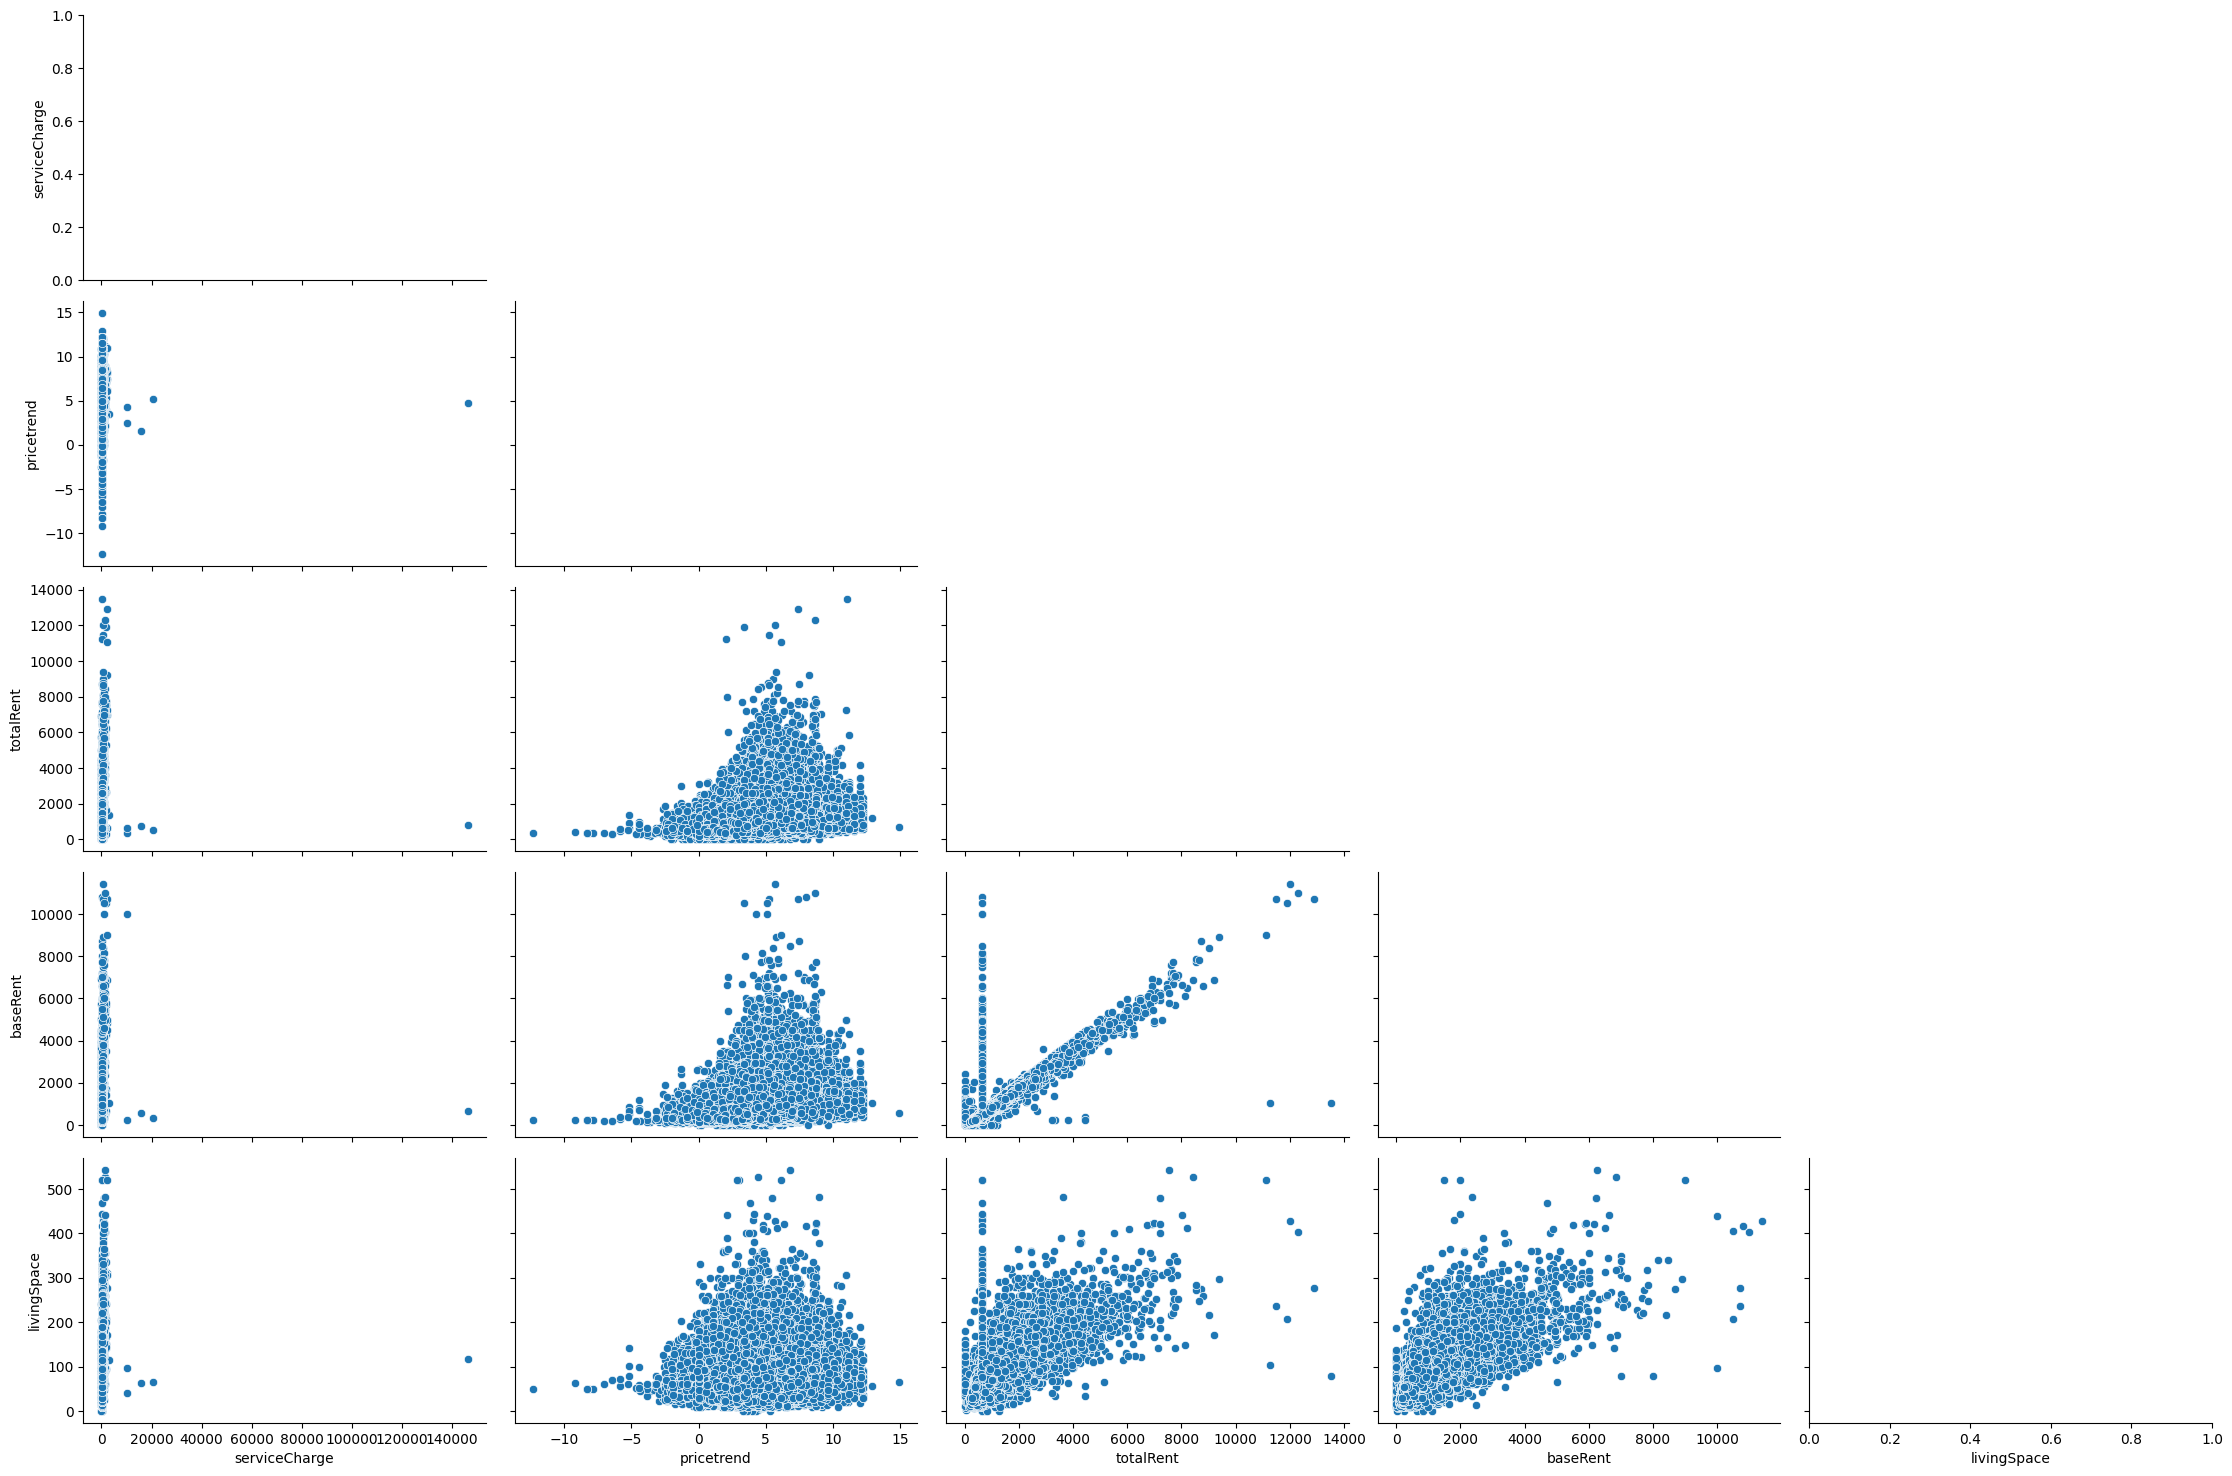

In [15]:
eda_helper_functions.pair_plots(train.select_dtypes(include='number'))

## 5. Correlation Analysis

In [16]:
corr_matrix = train.select_dtypes(include='number').corr()
corr_matrix

,serviceCharge,pricetrend,totalRent,baseRent,livingSpace
serviceCharge,1.000000,0.060347,0.166302,0.169891,0.176805
pricetrend,0.060347,1.000000,0.405541,0.437887,0.183706
totalRent,0.166302,0.405541,1.000000,0.890979,0.675263
baseRent,0.169891,0.437887,0.890979,1.000000,0.731888
livingSpace,0.176805,0.183706,0.675263,0.731888,1.000000


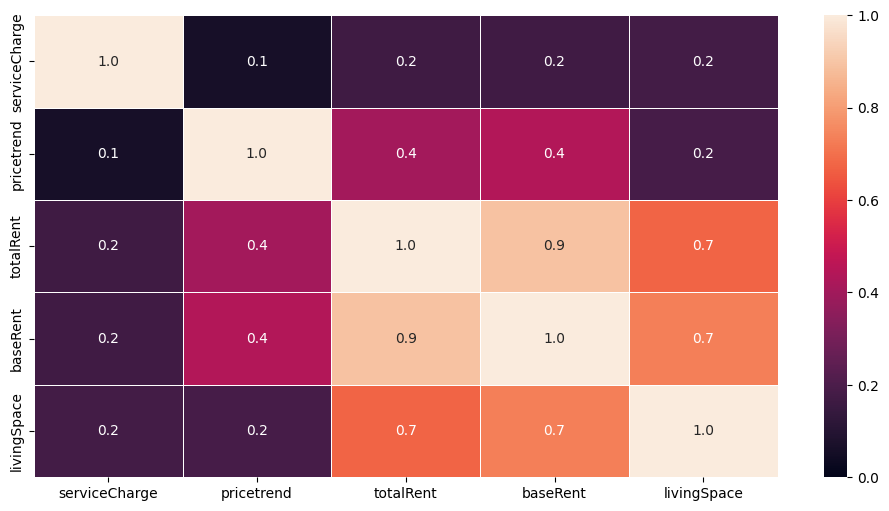

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot= True, fmt=".1f", linewidths=.5, cbar= True, vmax=1, vmin=0)
plt.show()

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramer's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select categorical columns
categorical_cols = train.select_dtypes(include=['object', 'bool']).columns

# Calculate Cramer's V for each pair of categorical columns
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

categorical_cols = train.select_dtypes(include=['object', 'bool']).columns

# Calculate Cramer's V for each pair of categorical columns
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(train[col1], train[col2])

# Convert to float for heatmap
cramers_v_matrix = cramers_v_matrix.astype(float)



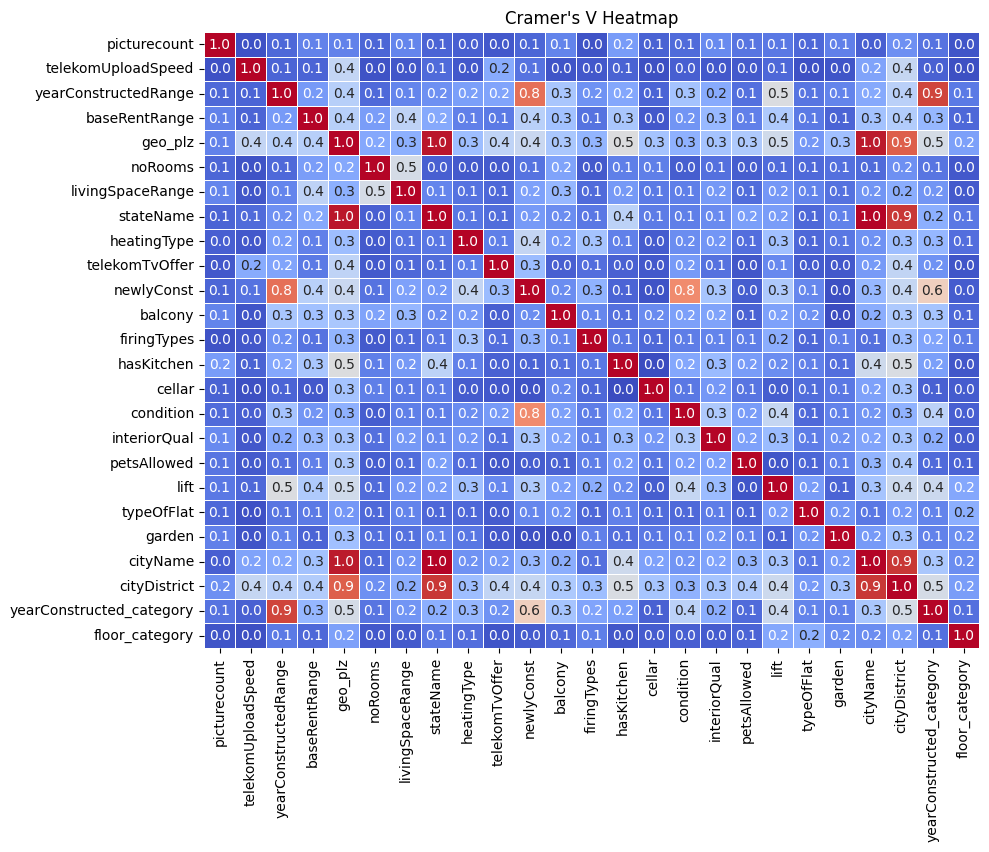

In [20]:

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar=False,fmt=".1f", linewidths=.5)
plt.title("Cramer's V Heatmap")
plt.show()

## 6. Deatiled Analysis

In [21]:
eda_helper_functions.cat_summary(train, "stateName")

0         Nordrhein_Westfalen
1                     Sachsen
2                     Sachsen
3                      Bremen
4          Schleswig_Holstein
                 ...         
200136                 Bayern
200137                 Hessen
200138                 Hessen
200139    Nordrhein_Westfalen
200140                 Hessen
Name: stateName, Length: 200141, dtype: object

Data Type      : object
Cardinality    : 16 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 200,141 / 200,141 rows


,
count,200141
unique,16
top,Nordrhein_Westfalen
freq,49117


,count,percentage
category,,
Nordrhein_Westfalen,49117,0.245412
Sachsen,40486,0.202287
Bayern,16202,0.080953
Sachsen_Anhalt,14819,0.074043
Hessen,12971,0.064809
Niedersachsen,12550,0.062706
Baden_Württemberg,11328,0.056600
Berlin,8640,0.043170
Thüringen,6077,0.030364


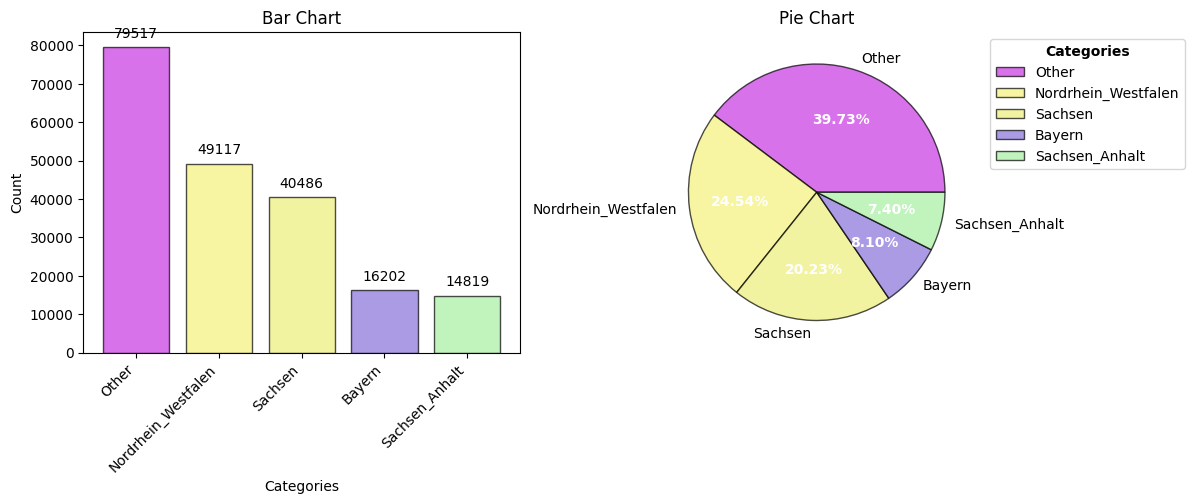

In [22]:
eda_helper_functions.cat_univar_plots(train, "stateName", show_wordcloud= False, k=4)  #k =4 top 4 categories

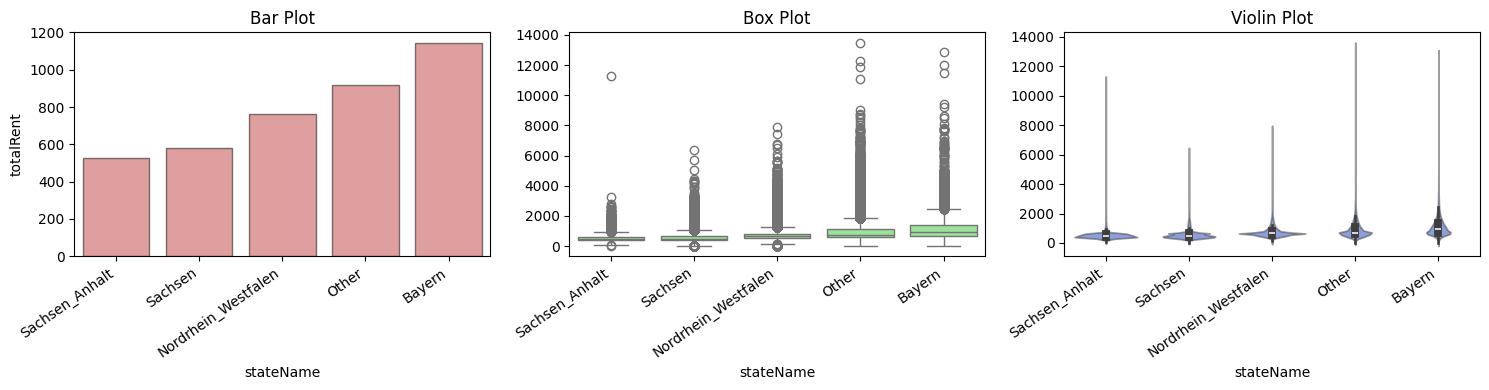

In [23]:
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var= "totalRent",
    cat_var= "stateName",
    k=4
)

In [24]:
eda_helper_functions.num_cat_hyp_testing(train, "totalRent","stateName")


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 3472.2950164618665
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables totalRent and stateName are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 59598.52777336757
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables totalRent and stateName are associated to each other


noRooms         object
livingSpace    float64
dtype: object


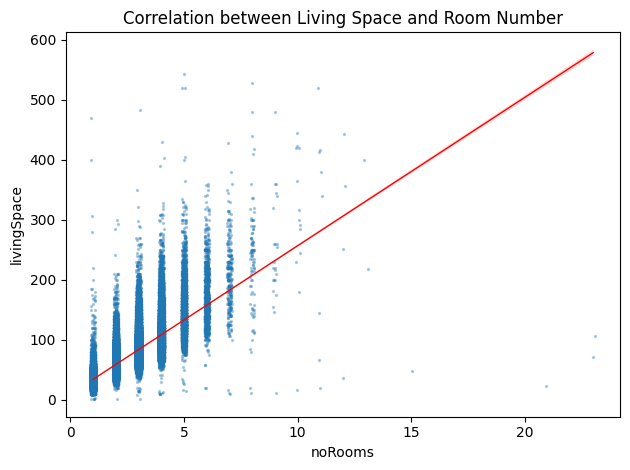

In [25]:
print(train[['noRooms', 'livingSpace']].dtypes)
train['noRooms'] = pd.to_numeric(train['noRooms'], errors='coerce')
train['livingSpace'] = pd.to_numeric(train['livingSpace'], errors='coerce')


sns.regplot(data=train, x='noRooms', y='livingSpace',x_jitter = 0.1,line_kws=dict(lw=1,color="r"),scatter_kws=dict(alpha=0.3, s=2))
plt.title('Correlation between Living Space and Room Number')
plt.tight_layout();

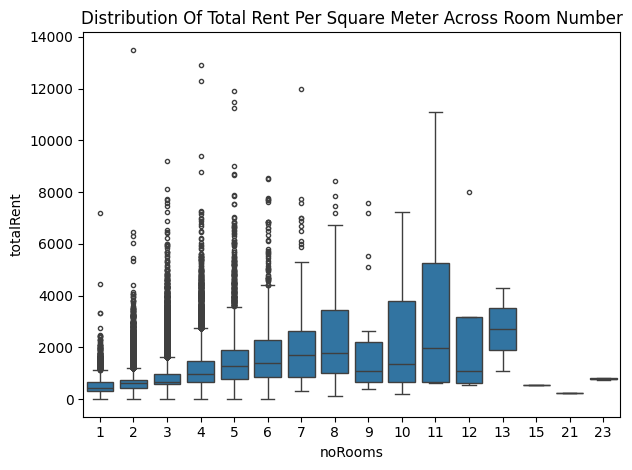

In [26]:
sns.boxplot(data=train, x='noRooms', y='totalRent',fliersize=3)
plt.title('Distribution Of Total Rent Per Square Meter Across Room Number')
plt.tight_layout()